In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd

In [2]:
X = pd.read_csv("train.csv")
y = X.pop("Survived")

In [3]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
X["Age"].fillna(X.Age.mean(), inplace=True)

In [5]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
X.columns

Index([u'PassengerId', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [7]:
X.drop(["Name", "PassengerId", "Parch"], axis=1, inplace=True)

In [8]:
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [9]:
describe_categorical(X)

,Sex,Ticket,Cabin,Embarked
count,891,891,204,889
unique,2,681,147,3
top,male,CA. 2343,C23 C25 C27,S
freq,577,7,4,644


In [10]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"

X["Cabin"] = X.Cabin.apply(clean_cabin)

In [11]:
categorical_variables = ['Sex', 'Cabin', 'Embarked', 'Ticket', 'Fare', 'Pclass']
for variable in categorical_variables:
    X[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [12]:
from sklearn.cross_validation import train_test_split
import numpy as np

In [13]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model.fit(X_train, y_train)
roc = roc_auc_score(y_test, model.predict(X_test))
print "C-stat: ", roc

C-stat:  0.880833333333


In [14]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=94)
model.fit(X, y)

1 loops, best of 3: 1min 3s per loop


In [15]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

1 loops, best of 3: 20.2 s per loop


In [18]:
model.feature_importances_


array([  9.86715629e-02,   2.91312165e-02,   1.42837890e-01,
         1.48418908e-01,   8.48955193e-04,   9.06061813e-04,
         3.24777796e-03,   1.43673879e-03,   6.09526964e-03,
         6.18735613e-04,   1.03695628e-04,   3.28454157e-02,
         2.89519516e-04,   4.07400674e-03,   0.00000000e+00,
         2.73906069e-03,   1.21287546e-02,   0.00000000e+00,
         1.29927189e-04,   4.55300203e-05,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.62658020e-04,
         0.00000000e+00,   0.00000000e+00,   2.50125843e-03,
         2.58772006e-03,   2.65492829e-03,   5.66285973e-05,
         0.00000000e+00,   0.00000000e+00,   6.49394832e-05,
         4.69876231e-05,   1.57949468e-03,   0.00000000e+00,
         1.43875863e-04,   2.83354890e-06,   1.47836944e-04,
         1.56194471e-04,   2.07000287e-03,   8.21087722e-05,
         2.71076998e-06,   2.80348795e-04,   1.91727067e-04,
         0.00000000e+00,   1.71047693e-05,   3.68706559e-05,
         2.00981762e-06,

In [19]:
%matplotlib inline

30 trees
C-stat:  0.875833333333

50 trees
C-stat:  0.874743589744

100 trees
C-stat:  0.880833333333

200 trees
C-stat:  0.880833333333

500 trees
C-stat:  0.876282051282

1000 trees
C-stat:  0.873141025641

2000 trees
C-stat:  0.876282051282



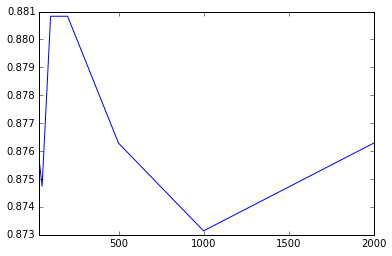

In [20]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    print trees, "trees"
    roc = roc_auc_score(y_test, model.predict(X_test))
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.880833333333

None option
C-stat:  0.880833333333

sqrt option
C-stat:  0.872179487179

log2 option
C-stat:  0.874487179487

0.9 option
C-stat:  0.879935897436

0.2 option
C-stat:  0.882756410256



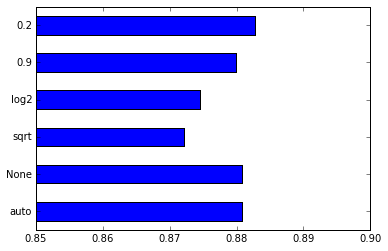

In [21]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X_train, y_train)
    print max_features, "option"
    roc = roc_auc_score(y_test, model.predict(X_test))
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.90));

1 min samples
C-stat:  0.880833333333

2 min samples
C-stat:  0.873076923077

3 min samples
C-stat:  0.882307692308

4 min samples
C-stat:  0.885064102564

5 min samples
C-stat:  0.878846153846

6 min samples
C-stat:  0.872115384615

7 min samples
C-stat:  0.868782051282

8 min samples
C-stat:  0.867371794872

9 min samples
C-stat:  0.8625

10 min samples
C-stat:  0.862307692308



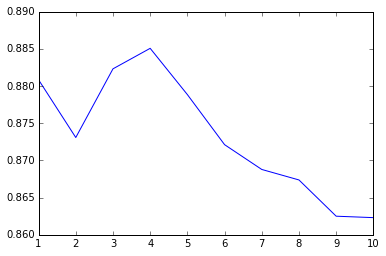

In [22]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=100, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X_train, y_train)
    print min_samples, "min samples"
    roc = roc_auc_score(y_test, model.predict(X_test))
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

In [23]:
model.oob_score_

0.41302834537909849

In [29]:
model = RandomForestRegressor(n_estimators=100, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=89, 
                              max_features="auto", 
                              min_samples_leaf=4)
model.fit(X_train, y_train)
roc = roc_auc_score(y_test, model.predict(X_test))
print "C-stat: ", roc

C-stat:  0.886730769231
